<a href="https://colab.research.google.com/github/FelipeErmeson/Data-Science-Projects/blob/master/Analisando_os_Dados_do_Airbnb_em_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Madrid*

*by [Felipe Lima](https://www.linkedin.com/in/felipe-ermeson-b484bb128/)*

---

O [Airbnb](https://www.airbnb.com.br/) é um serviço online, fundado por Brian Chesky, Joe Gebbia e Nathan Blecharczyk em agosto de 2008, que tem por objetivo **pessoas anunciarem, encontrarem e reservarem meios de hospedagem**. 

A plataforma consegue **conectar pessoas** que tem o desejo de viajar e se hospedar, com anfitriões que querem alugar seus imóveis de uma forma prática. Esta solução sofre resistência em alguns países por setores contrários à chamada economia do compartilhamento.

Através de um iniciativa do Airbnb, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar alguns dados da própria empresa, a fim de fomentar a pesquisa, inovação e desenvolvimento de soluções de Data Science.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, vamos analisar os dados referentes à cidade de Madrid, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Analisando Airbnb" src='https://img.freepik.com/fotos-gratis/palacio-real-de-madri-espanha_1398-4247.jpg?w=1380&t=st=1656174853~exp=1656175453~hmac=8a9bc2d0919b78696ac24dfbb8c47898108a6a43d5f4cfbec594877e95a584a4'></center>

## Importação das Bibliotecas

In [1]:
!pip install plotly==5.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
import requests
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# from google.colab import drive

## Obtenção dos Dados


In [3]:
# montando o drive pessoal
# drive.mount('/content/drive')

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('./listings.csv')

## Análise dos Dados


**Dicionário de variáveis**

* id - Representa o identificador único para cada entrada.
* name - Descrição do apartamento/casa.
* host_id - Representa o identificador único do anfitrião.
* host_name - Nome do anfitrião.
* neighbourhood_group - Representa os distritos da cidade de Madrid.
* neighbourhood - Representa os bairros do distrito de Madrid.
* latitude - Coordenada de latitude em World Geodetic System (WGS84) do anfitrião.
* longitude - Coordenada de longitude em World Geodetic System (WGS84) do anfitrião.
* room_type - Representa o tipo de quarto que é ofertado.
* price - Preço diário para alugar o imóvel em moeda local.
* minimum_nights - Quantidade mínima de noites para reservar.
* number_of_reviews - Quantidade de reviews que a propriedade possui.
* last_review - Data do último review.
* reviews_per_month - Quantidade de reviews que a propriedade possui durante a vida útil da listagem.
* calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião.
* availability_365 - Quantidade de dias disponíveis durante um ano.
* number_of_reviews_ltm - Número de avaliações que a propriedade tem nos últimos 12 meses.
* license - Licença/autorização.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,59,1,81,2021-11-20,0.57,1,149,3,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.38,2,131,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,311,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,14,2021-11-29,0.16,1,167,4,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,154,2021-11-28,1.09,1,344,5,NaN


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print("Dataset possui {} entradas.".format(df.shape[0]))
print("Dataset possui {} atributos.\n".format(df.shape[1]))

display(df.dtypes)

Dataset possui 17831 entradas.
Dataset possui 18 atributos.



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.850709
reviews_per_month                 0.232965
last_review                       0.232965
host_name                         0.000449
name                              0.000168
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

#### **Paleta de cores**

In [7]:
sns.color_palette(['#F7F7F7', '#F2F2F2', "#BFBFBF", "#A6A6A6", '#808080'])

[(0.9686274509803922, 0.9686274509803922, 0.9686274509803922),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.7490196078431373, 0.7490196078431373, 0.7490196078431373),
 (0.6509803921568628, 0.6509803921568628, 0.6509803921568628),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]

In [8]:
sns.color_palette(["#F2F2F2", "#4F81BD", "#5B9BD5", "#64A5DE"])
# sns.color_palette(["#FF395F", "#E8DFFA", "#82689E", "#45004A", "#CF9CD2", "#9464DE"])

[(0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.30980392156862746, 0.5058823529411764, 0.7411764705882353),
 (0.3568627450980392, 0.6078431372549019, 0.8352941176470589),
 (0.39215686274509803, 0.6470588235294118, 0.8705882352941177)]

In [8]:
COR_DE_FUNDO = "#F7F7F7"
CINZA = "#F2F2F2"
CINZA_ESCURO = "#808080"
AZUL = "#4F81BD"

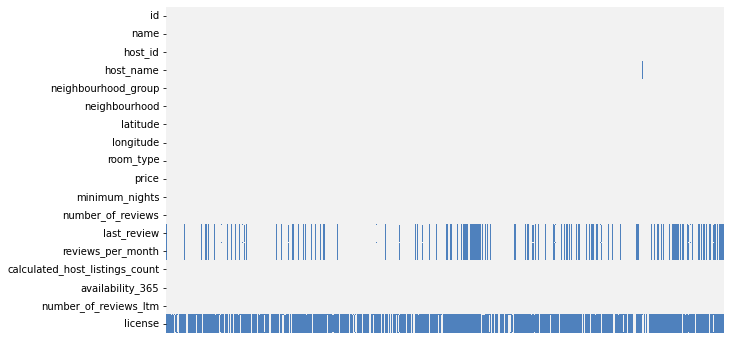

In [10]:
sns.set_palette([CINZA, AZUL])
fig, ax = plt.subplots(figsize=(10,6))
heatmap = sns.heatmap(df.isnull().T, cbar=False, cmap=sns.color_palette(n_colors=2), ax=ax)
ax.set_xticks([])
plt.show()

### **Qual o tipo de distribuição das variáveis?**

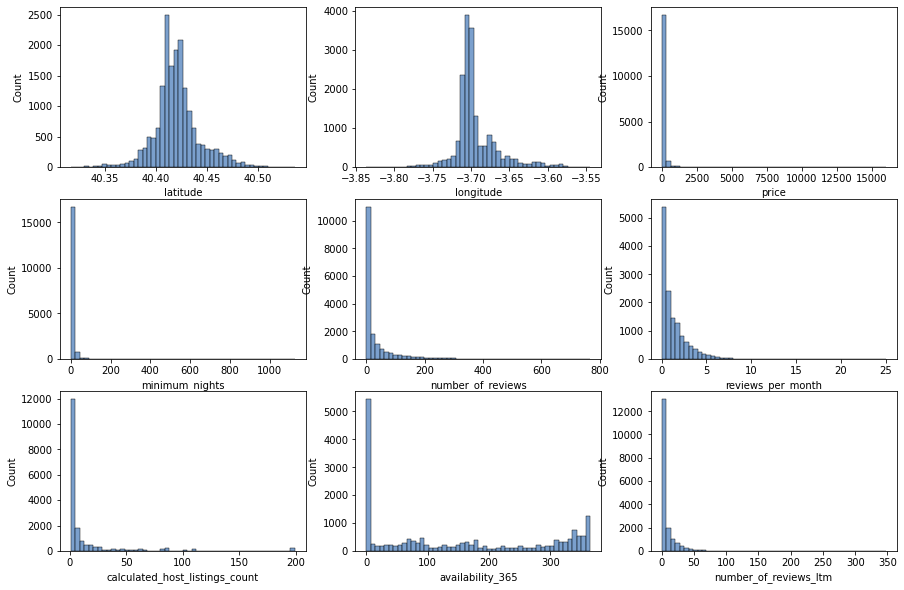

In [11]:
# plotar o histograma das variáveis numéricas
sns.set_palette([AZUL, CINZA])
linha, coluna = 3,3
fig, axes = plt.subplots(linha, coluna, figsize=(15,10))
columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
i_column = 0
for i in range(3):
  for j in range(3):
    sns.histplot(ax=axes[i,j], data=df.drop(['id','host_id'], axis=1), x=columns[i_column], color=sns.color_palette(n_colors=1), bins=50);
    i_column += 1
plt.show();

### **Qual a média dos preços de aluguel?**
A média é uma informação que representa um pouco dos nossos dados. Porém, se os dados possuem **outliers** (pontos fora da curva), a média acaba sendo distorcida.

In [9]:
df.price.mean()

135.3471482250014

Ciente dos problemas da média, vamos plotar um gráfico de boxplot, que pode nos informar de possíveis outliers, e nos mostra o intervalo de maior frequência dos nossos dados.

Podemos observar que temos vários pontos distantes da nossa caixa. E principalmente os valores acima de 4000 chamam muita atenção. 

Esses outliers podem ser erros do app ou podem ser casas/apto de luxo, é necessária uma investigação mais profunda para descobrir.

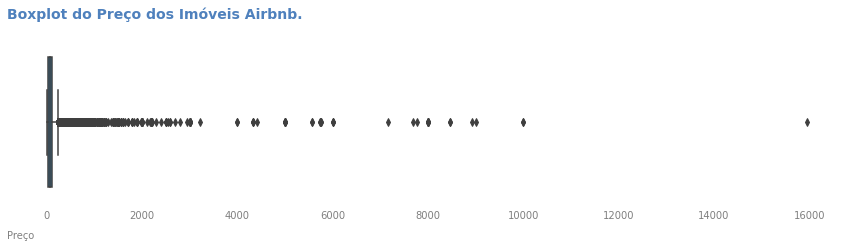

In [12]:
fig, ax = plt.subplots(figsize=(15,3))
g = sns.boxplot(x=df.price, ax=ax)
ax.set_title('Boxplot do Preço dos Imóveis Airbnb.', color=AZUL, x=0.175, y=1.1, size=14, fontweight='semibold') #'#A6A6A6'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
# ax.set_facecolor('#F7F7F7') #alterando cor de fundo
plt.show();

Percebemos que valores maiores que 1200 representa menos que 1% do nosso conjunto de dados. 

In [16]:
valor_corte = 1200
print("Valores maiores que {} representa {:.2f} % do dataset".format(valor_corte, (df[df.price > valor_corte].shape[0] / df.shape[0]) * 100))
print("Quantidade de elementos maiores que {}: {}".format(valor_corte, df[df.price > valor_corte].shape[0]))

Valores maiores que 1200 representa 0.77 % do dataset
Quantidade de elementos maiores que 1200: 138


Ao plotar o gráfico de boxplot com o preço menor que o valor de corte, percebemos que a maioria dos dados estão abaixo de 200.

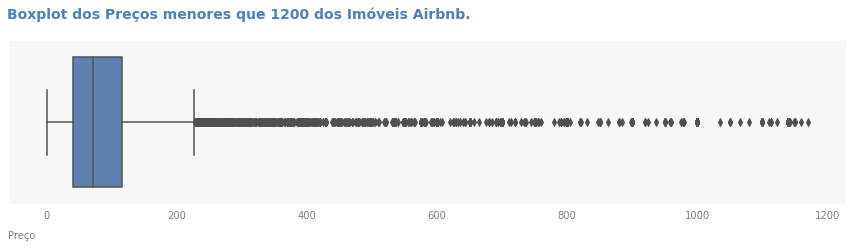

In [18]:
# df[df.price < 1200].price.plot(kind='box', vert=False, figsize=(15, 3)).set(title='Boxplot - Preço menor que {}'.format(valor_corte));
fig, ax = plt.subplots(figsize=(15,3))
g = sns.boxplot(x=df[df.price < 1200].price)
ax.set_title('Boxplot dos Preços menores que {} dos Imóveis Airbnb.'.format(valor_corte), color=AZUL, x=0.275, y=1.1, size=14, fontweight='semibold') #'#A6A6A6'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo
plt.show();

In [19]:
print("Valores abaixo de 250 representa {:.2f}% dos dados.".format(df[df.price < 250].shape[0] / df.shape[0] * 100))

Valores abaixo de 250 representa 91.22% dos dados.


### **Qual a correlação existente entre as variáveis**

Ao calcular a correlação das variáveis eliminamos os identificadores, pois não representa nenhuma informação útil para essa análise.

In [20]:
# criar uma matriz de correlação
df_corr = df.drop(['id', 'host_id'], axis=1).corr()

# mostrar a matriz de correlação
df_corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.252443,0.024495,0.014862,-0.044993,-0.039594,-0.008244,0.006001,-0.026289
longitude,0.252443,1.000000,0.057064,-0.025171,-0.043225,-0.013764,-0.038548,0.018927,-0.035233
price,0.024495,0.057064,1.000000,0.013320,-0.028580,-0.018193,0.001959,0.049091,-0.060110
minimum_nights,0.014862,-0.025171,0.013320,1.000000,-0.038926,-0.062163,-0.019347,0.034016,-0.066726
number_of_reviews,-0.044993,-0.043225,-0.028580,-0.038926,1.000000,0.616221,-0.024241,0.048471,0.556870
reviews_per_month,-0.039594,-0.013764,-0.018193,-0.062163,0.616221,1.000000,0.035628,0.139259,0.716653
calculated_host_listings_count,-0.008244,-0.038548,0.001959,-0.019347,-0.024241,0.035628,1.000000,0.069433,0.057212
availability_365,0.006001,0.018927,0.049091,0.034016,0.048471,0.139259,0.069433,1.000000,0.134041
number_of_reviews_ltm,-0.026289,-0.035233,-0.060110,-0.066726,0.556870,0.716653,0.057212,0.134041,1.000000


Vemos que as variáveis que possuem uma correlaçao forte positiva são:
* reviews_per_month e number_of_reviews_ltm, 
* reviews_per_month e number_of_reviews e 
* number_of_reviews_ltm e number_of_reviews.

Faz todo o sentido ter essa correlação da quantidade de reviews com a quantidade de reviews por mês, já que se um aumenta o outro consequentemente irá aumentar.

Vamos eliminar o espelho do mapa de calor de correlações.

In [21]:
df_corr = df_corr.where(np.tril(np.ones(df_corr.shape)).astype(bool))

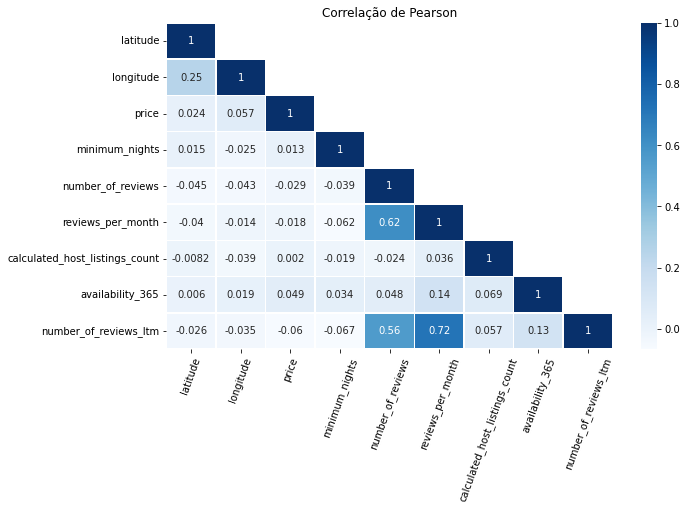

In [22]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.heatmap(df_corr, annot=True, cmap='Blues', ax=ax, linewidths=.5)
ax.set_xticklabels(df_corr.columns, rotation=70)
ax.set_title('Correlação de Pearson');

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Nenhuma surpresa ao ver casa/apt e quarto privado no topo da lista. E esses dois tipos representa mais de 96% de todo o dataset.

In [23]:
# mostrar a quantidade de cada tipo de imóvel disponível
room_types = df.room_type.value_counts()
room_types

Entire home/apt    10846
Private room        6594
Shared room          238
Hotel room           153
Name: room_type, dtype: int64

In [24]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts(normalize=True)

Entire home/apt    0.608267
Private room       0.369805
Shared room        0.013348
Hotel room         0.008581
Name: room_type, dtype: float64

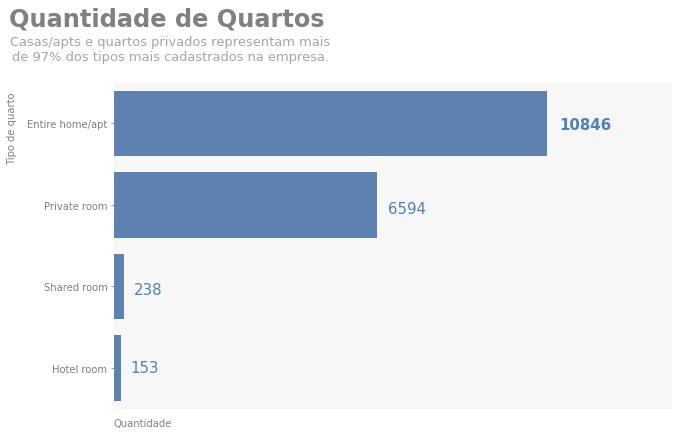

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_palette([AZUL, CINZA])
sns.countplot(y='room_type', data=df, palette=sns.color_palette(n_colors=1), order=room_types.index.tolist(), ax=ax)

ax.text(-2650, -1.2,'Quantidade de Quartos', fontsize=24, color=CINZA_ESCURO, fontweight='bold')
ax.set_title('Casas/apts e quartos privados representam mais\nde 97% dos tipos mais cadastrados na empresa.', color='#A6A6A6', x=0.1, y=1.05, size=13)

#removendo linhas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['bottom'].set_color(CINZA_ESCURO) #alterando cor da linha bottom
ax.tick_params(colors=CINZA_ESCURO, labelbottom=False, bottom=False) #alterando cor dos valores de x e y, e desabilitando label bottom e tick bottom
#alterando labels
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Tipo de quarto', y=0.86, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo

plt.xlim([0, 14000]) # alterando limites do eixo x

# legenda no final de cada barra
ax.annotate(
    str(room_types[0]),
    xy=(9900, 0.07),
    xytext=(50,0),
    textcoords='offset points',
    color=AZUL,
    fontsize=15,
    fontweight='semibold'
            )

ax.annotate(
    str(room_types[1]),
    xy=(5600, 1.1),
    xytext=(50,0),
    textcoords='offset points',
    color=AZUL,
    fontsize=15,
    fontweight='medium'
            )

ax.annotate(
    str(room_types[2]),
    xy=(100, 2.1),
    xytext=(15,0),
    textcoords='offset points',
    color=AZUL,
    fontsize=15,
    fontweight='medium'
            )

ax.annotate(
    str(room_types[3]),
    xy=(15, 3.05),
    xytext=(15,0),
    textcoords='offset points',
    color=AZUL,
    fontsize=15,
    fontweight='medium'
            )

plt.show()

### **Qual a localidade mais cara do dataset?**

Temos Palomeras Bajas, San Andrés e Rosas como top-3 do dataset. Porém, ao investigar mais a fundo percebemos que o bairro de Palomeras Bajas possui outliers que distorcem muito a média. Ao retirarmos outliers maiores que 2000 percebemos que a média de preço fica um pouco mais de 98!


In [26]:
# ver preços por bairros, na média
(df.groupby('neighbourhood').price.mean()).sort_values(ascending=False)

neighbourhood
Palomeras Bajas    503.160714
San Andrés         469.891304
Rosas              462.301370
Canillejas         451.421687
Arcos              414.176471
                      ...    
Cuatro Vientos      46.307692
Aluche              44.155844
Butarque            44.000000
Pavones             39.833333
Atalaya             39.000000
Name: price, Length: 128, dtype: float64

In [27]:
print(df[df.neighbourhood == "Aluche"].shape)

(77, 18)


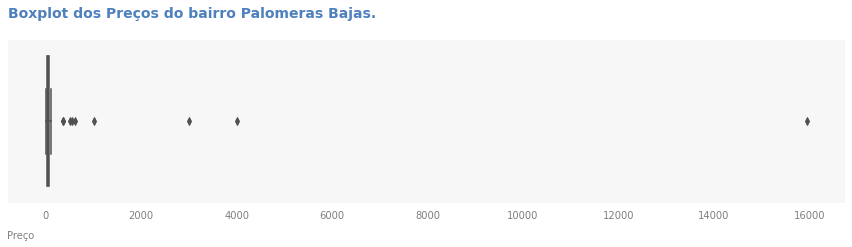

In [29]:
fig, ax = plt.subplots(figsize=(15,3))
g = sns.boxplot(x=df[df['neighbourhood'] == 'Palomeras Bajas'].price)
ax.set_title('Boxplot dos Preços do bairro Palomeras Bajas.', color=AZUL, x=0.22, y=1.1, size=14, fontweight='semibold') #'#A6A6A6'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo
plt.show();

In [30]:
df[df['neighbourhood'] == 'Palomeras Bajas'].price.sort_values(ascending=False)[:20]

13573    15960
9240      4000
9312      3000
9198      1000
7095       600
9104       540
9835       500
9765       350
9029       350
11775      111
17051       83
17336       77
3331        70
12805       68
9228        68
1116        63
7916        60
1711        60
7100        59
12133       58
Name: price, dtype: int64

In [31]:
df[(df['neighbourhood'] == 'Palomeras Bajas') & (df.price < 2000)].price.mean()

98.43396226415095

Vamos limpar o nosso dataset eliminando as instâncias que possuem preço maiores que 1200 (valor corte), e ao verificar novamente os bairros mais caros temos:

* Rosas
* Hellín
* El Pardo

Ao analisar o boxplot do bairro de Rosas, podemos verificar que possuem propriedades mais caras para aluguel.

In [32]:
df_price_clean = df[df.price < valor_corte]
df_price_clean.shape

(17676, 18)

In [33]:
(df_price_clean.groupby('neighbourhood').price.mean()).sort_values(ascending=False)

neighbourhood
Rosas       354.462687
Hellín      346.424242
El Pardo    274.500000
Amposta     249.153846
Arcos       233.108696
               ...    
Aluche       44.155844
Butarque     44.000000
Orcasur      42.416667
Pavones      39.833333
Atalaya      39.000000
Name: price, Length: 128, dtype: float64

In [34]:
df_price_clean[df_price_clean['neighbourhood'] == 'Rosas'].price.sort_values(ascending=False)[:20]

9292    1100
9810    1000
9766    1000
8985     950
9037     950
9065     900
9797     850
9724     850
9919     800
9187     800
8942     800
9449     800
9459     750
9582     750
4951     700
9327     700
9654     520
9640     500
9183     500
9223     500
Name: price, dtype: int64

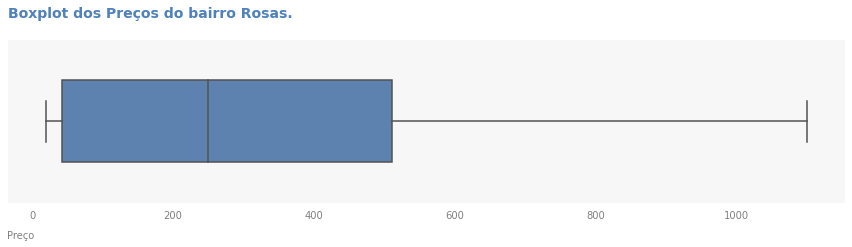

In [35]:
fig, ax = plt.subplots(figsize=(15,3))
g = sns.boxplot(x=df_price_clean[df_price_clean['neighbourhood'] == 'Rosas'].price, width=0.5)
ax.set_title('Boxplot dos Preços do bairro Rosas.', color=AZUL, x=0.17, y=1.1, size=14, fontweight='semibold') #'#A6A6A6'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo
plt.show();

### **Qual o distrito que possue a mediana mais alta?**

Percebemos que o distrito com a maior mediana é o de Salamanca, porém ao olhar o gráfico com mais atenção, percebemos que **San Blas - Canillejas** possue mais casas com um custo de vida mais elevada, apesar da mediana ser menor que Salamanca.

Ao agrupar a quantidade de casas por distrito, temos mais propriedades no **Centro**. O que faz bastante sentido, e que corresponde a aprox. 45% de todo o conjunto de dados.

In [36]:
my_order = df_price_clean.groupby(by=["neighbourhood_group"])["price"].median().sort_values(ascending=False).index #.iloc[::-1]

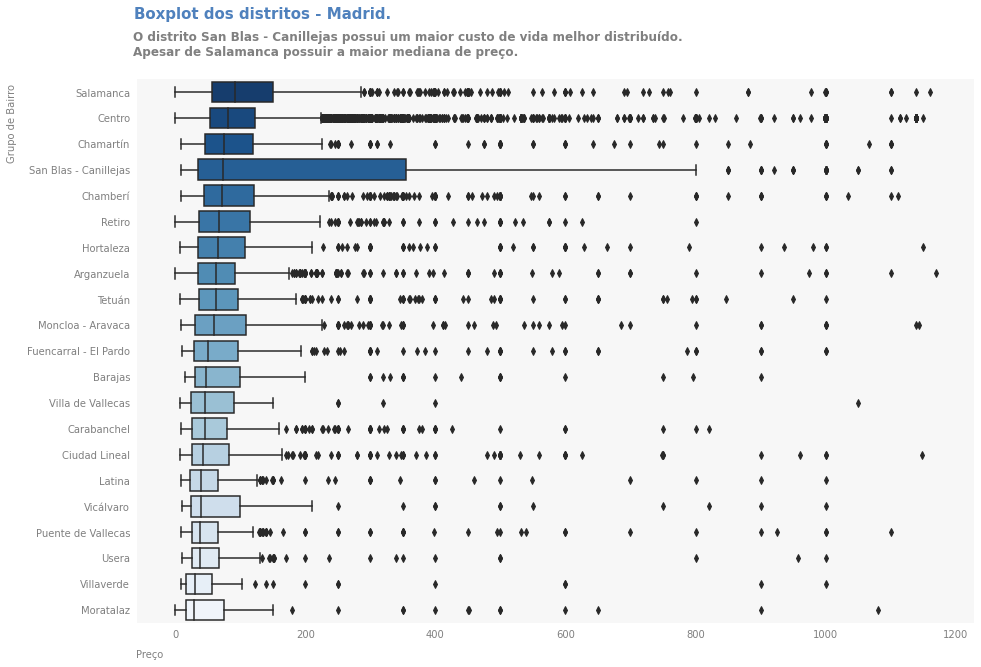

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_price_clean, x="price", y="neighbourhood_group", order=my_order, orient="h", palette="Blues_r", ax=ax)
ax.set_title('Boxplot dos distritos - Madrid.', color=AZUL, x=0.15, y=1.1, size=15, fontweight='bold') #'#A6A6A6'
ax.text(-65, -1.4,'O distrito San Blas - Canillejas possui um maior custo de vida melhor distribuído.\nApesar de Salamanca possuir a maior mediana de preço.', fontsize=12, color=CINZA_ESCURO, fontweight='semibold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Grupo de Bairro', y=0.92, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo
plt.show();

In [38]:
df_price_clean.neighbourhood_group.value_counts()

Centro                   8089
Salamanca                1213
Chamberí                 1056
Arganzuela                975
Tetuán                    755
Carabanchel               610
Retiro                    608
Ciudad Lineal             524
Chamartín                 509
Moncloa - Aravaca         501
Latina                    482
Puente de Vallecas        478
San Blas - Canillejas     423
Hortaleza                 351
Fuencarral - El Pardo     271
Usera                     257
Villaverde                165
Barajas                   137
Moratalaz                 120
Villa de Vallecas          80
Vicálvaro                  72
Name: neighbourhood_group, dtype: int64

In [39]:
df_price_clean.neighbourhood_group.value_counts(normalize=True)[:5]

Centro        0.457626
Salamanca     0.068624
Chamberí      0.059742
Arganzuela    0.055160
Tetuán        0.042713
Name: neighbourhood_group, dtype: float64

### **Qual a distribuição de cada propriedade em latitude e longitude, em função do preço?**

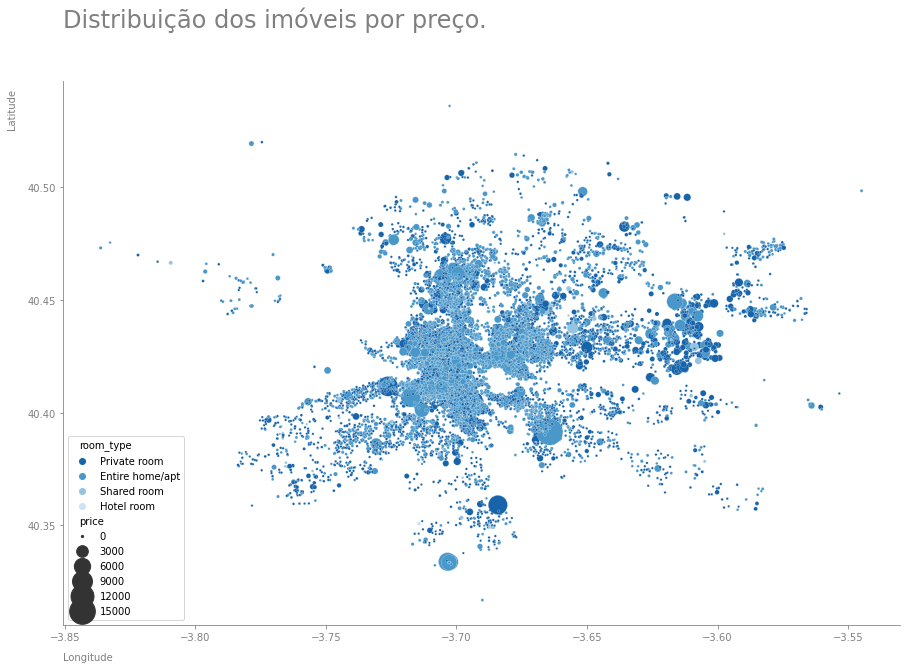

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.scatterplot(data=df, x="longitude", y="latitude", hue="room_type", size="price", sizes=(5, 700), palette='Blues_r', ax=ax)
ax.text(0, 1.1,'Distribuição dos imóveis por preço.', fontsize=24, color=CINZA_ESCURO, transform=ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Longitude', color=CINZA_ESCURO, x=0.03, labelpad=10)
ax.set_ylabel(ylabel='Latitude', color=CINZA_ESCURO, y=0.95, labelpad=10)
plt.show()

In [41]:
# lendo json com limites de Madrid
with open('./madrid_geo.json', 'r') as read_file:
    madrid_geo_json = json.load(read_file)

In [42]:
# scatter de cidades e adição de camadas que mostra os limites da cidade
px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="name", size='price', color='room_type', size_max=20, color_continuous_scale=px.colors.cyclical.IceFire).update_layout(
    title_text = 'Hospedagens Airbnb de acordo com o preço<br>Cidades de Madrid 2022',
    showlegend = True,
    mapbox={
        "style": "carto-positron",
        "zoom": 9.5,
        "layers": [
            {
                "source": madrid_geo_json,
                "type": "line",
                "color": "green",
                "line": {"width": 1},
            }
        ],
    }
)

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Vemos que a média é um pouco mais de 7 dias, porém temos outliers nessa coluna. Pouco mais de 90% dos dados o intervalo predominante é entre 1 e 6 noites. 

In [43]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

7.430037575009814

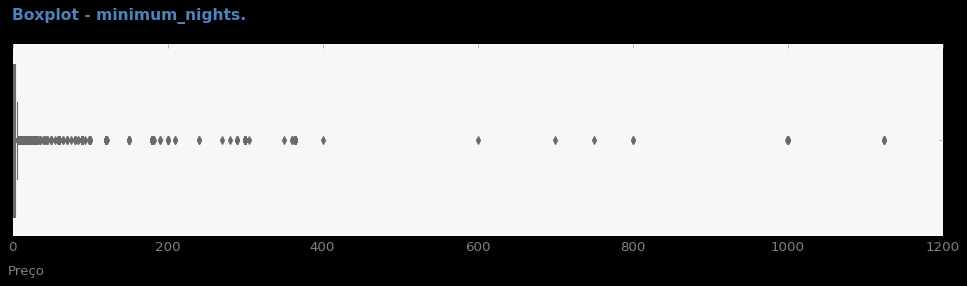

In [81]:
fig, ax = plt.subplots(figsize=(15,3))
g = sns.boxplot(x=df.minimum_nights)
ax.set_title('Boxplot - minimum_nights.', color=AZUL, x=0.125, y=1.1, size=14, fontweight='semibold') #'#A6A6A6'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo
plt.show();

In [45]:
df[df['minimum_nights']<10].minimum_nights.shape[0]/df.shape[0]

0.9018563176490382

In [111]:
fig, ax = plt.subplots(figsize=(15,3))
g = sns.boxplot(x=df[df['minimum_nights']<10].minimum_nights, width=0.5)
ax.set_title('Boxplot - minimum_nights.', color=AZUL, x=0.125, y=1.1, size=14, fontweight='semibold') #'#A6A6A6'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors=CINZA_ESCURO, bottom=False, left=False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Preço', x=0.015, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(COR_DE_FUNDO) #alterando cor de fundo
plt.show();

OSError: ignored

In [47]:
df[df['minimum_nights']>400].shape

(14, 18)

Analisando propriedades com preço maior que 2000, percebemos que são de caráter luxuoso, o que explica vários outliers.

In [48]:
df[df['price']>2000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
345,1101760,GREAT ATTIC-BARRIO DE LAS LETRA,2847013,Santiago,Centro,Cortes,40.413400,-3.697300,Entire home/apt,9999,2,312,2020-03-18,2.98,4,0,0,NaN
891,4421901,Tu Casa en el Corazon de Madrid (1er D),12027564,Trifinio,Centro,Cortes,40.413320,-3.696360,Entire home/apt,9999,2,441,2020-04-26,5.09,10,252,0,NaN
1616,8394827,Galery appartment downtown,30348413,Enrique H,Centro,Cortes,40.413300,-3.696780,Entire home/apt,8000,3,224,2020-03-11,3.05,4,1,0,VT-9971
2197,11780499,CH5! DUPLEXMega!,51636039,CriteriaHome!,Villaverde,San Andrés,40.333660,-3.702270,Entire home/apt,5571,2,38,2018-11-02,0.55,12,0,0,VT-3483
2726,13892731,Diseño en Atocha,29053317,Doris,Arganzuela,Palos de Moguer,40.403760,-3.693720,Entire home/apt,7170,2,48,2020-03-31,0.73,3,311,0,VT-267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14808,49193831,Villa Sandino - Two bedrooms economic 1,392790154,Apartamentos Temporales,Tetuán,Valdeacederas,40.461730,-3.699350,Entire home/apt,4321,7,4,2021-08-25,0.62,57,116,4,NaN
15516,50518352,Habitación,46434417,Nancy,Salamanca,Recoletos,40.425030,-3.683850,Entire home/apt,5000,1,0,NaN,NaN,1,311,0,NaN
17028,53018750,HUERTAS IV,28038703,Luxury Rentals Madrid,Centro,Cortes,40.413830,-3.699010,Entire home/apt,5000,1,0,NaN,NaN,110,338,0,NaN
17501,53430846,HOMEAbroad Apartments - Super Deluxe Madrid Ce...,250112582,HomeAbroad Apartments,Centro,Embajadores,40.411290,-3.705580,Entire home/apt,3218,1,0,NaN,NaN,4,120,0,000/EnTramite


Percebemos que existem propriedades com o preço zerado. Uma provável explicação é que a coluna availability_365 está também zerada, e nos mostra que a propriedade não está disponível nos próximos 365 dias.

In [49]:
df[df.price == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
12582,42431404,Hotel Santo Domingo,312813621,Hotel Santo Domingo,Centro,Palacio,40.42065,-3.70854,Hotel room,0,1,10,2021-10-30,1.73,1,0,10,NaN
12583,42431465,Petit Hostel,312021837,Petit Hostel,Arganzuela,Imperial,40.40884,-3.71704,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
12624,42535245,TÓTEM Madrid Hotel Boutique,318902993,TÓTEM Madrid Hotel Boutique,Salamanca,Recoletos,40.42660,-3.68542,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
12650,42583183,Scout Madrid Hostel,314090026,Laura,Moratalaz,Media Legua,40.40878,-3.65448,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
12651,42583326,Ok Hostel Madrid,222405469,Ok Hostel,Centro,Embajadores,40.41114,-3.70679,Hotel room,0,1,5,2021-10-23,0.60,2,0,5,NaN
12836,43078553,NH Madrid Atocha,310825661,NH Atocha,Retiro,Jerónimos,40.40801,-3.68929,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
13539,45167108,BLESS Hotel Madrid 5*,364774870,Bless Hotel Madrid,Salamanca,Recoletos,40.42812,-3.68354,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
13779,45840787,Pestana Plaza Mayor,371638561,Pestana,Centro,Sol,40.41477,-3.70705,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN


In [50]:
df[df.price == 0].shape

(8, 18)

## Conclusões


* Percebemos que preços abaixo de 250 representa mais de 90% dos dados e que os maiores preços provavelmente são propriedades de luxo.
* O distrito que possue uma consistência mais cara é San Blas - Canillejas.
* Pra quem precisa economizar o distrito mais em conta (barato) é Moratalaz e Villaverde.
* A mediana do número mínimo de noites é 2, o que faz bastante sentido, já que geralmente as pessoas alugam sábado e domingo.

## Referências
http://insideairbnb.com/get-the-data/

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896

https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/

https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/madrid.geojson

https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

https://matplotlib.org/stable/api/